In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
dataset=pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
print(x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


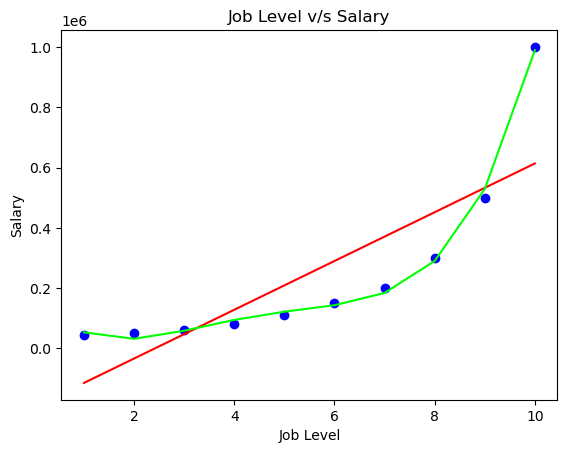

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
reg=LinearRegression()
x_poly=pf.fit_transform(x)
reg.fit(x,y)
reg2=LinearRegression()
reg2.fit(x_poly,y)
plt.scatter(x,y,color='blue')
plt.title('Job Level v/s Salary')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.plot(x,reg.predict(x),color='red')
plt.plot(x,reg2.predict(x_poly),color='lime')
plt.show()


In [112]:
print(reg.predict([[6.5]]))
print(reg2.predict(pf.fit_transform([[6.5]])))

[330378.78787879]
[158862.45265153]


In [113]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [114]:
from sklearn.preprocessing import StandardScaler
ssx=StandardScaler()
x=ssx.fit_transform(x)
ssy=StandardScaler()
y=ssy.fit_transform(y)

In [115]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x,y) 

c:\Users\eshaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [116]:
print(ssy.inverse_transform(svr.predict(ssx.transform([[6.5]])).reshape(-1,1)))

[[170370.0204065]]


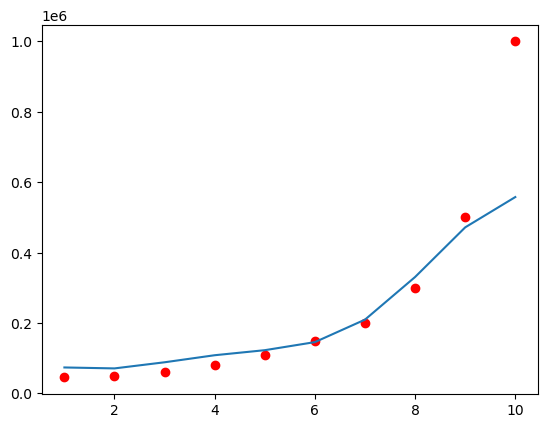

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
plt.scatter(ssx.inverse_transform(x),ssy.inverse_transform(y),color='red')
plt.plot(ssx.inverse_transform(x),ssy.inverse_transform(svr.predict(x).reshape(-1,1)))
plt.show()